In [2]:
pip install pandas matplotlib openpyxl


Note: you may need to restart the kernel to use updated packages.


In [26]:
#CARICO IL DATASET

In [27]:
import pandas as pd

file_path = "/Users/ildon91/Desktop/corso epicode/M3/dapt2024/esame/covid_data.xlsx"
df = pd.read_excel(file_path)

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())


Dataset Shape: (409562, 67)
Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_f

In [31]:
#CALCOLO I CASI TOTALI PER CONTINENTE

In [32]:
# Raggruppamento per continente e calcolo del totale
continent_cases = df.groupby('continent')['total_cases'].sum().dropna()
print(continent_cases)


continent
Africa           1.397275e+10
Asia             2.373950e+11
Europe           2.243707e+11
North America    1.210058e+11
Oceania          1.086353e+10
South America    7.012202e+10
Name: total_cases, dtype: float64


In [33]:
#COMPARO I DUE CONTINENTI

In [57]:
import pandas as pd

# Carico il file Excel
file_path = "/Users/ildon91/Desktop/corso epicode/M3/dapt2024/esame/covid_data.xlsx"
df = pd.read_excel(file_path)

# Mi assicuro che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Definisco una funzione per confrontare i continenti
def compare_continents(cont1, cont2):
    # Filtro i dati per i due continenti e seleziono i casi totali
    cont1_data = df[df['continent'] == cont1]['total_cases'].dropna()
    cont2_data = df[df['continent'] == cont2]['total_cases'].dropna()
    
    # Calcolo i descrittori statistici per il primo continente
    cont1_stats = {
        'max': cont1_data.max(),
        'mean': cont1_data.mean(),
        'percentage': (cont1_data.sum() / df['total_cases'].sum()) * 100
    }
    
    # Calcolo i descrittori statistici per il secondo continente
    cont2_stats = {
        'max': cont2_data.max(),
        'mean': cont2_data.mean(),
        'percentage': (cont2_data.sum() / df['total_cases'].sum()) * 100
    }
    
    # Restituisco i risultati in un dizionario
    comparison = {
        cont1: cont1_stats,
        cont2: cont2_stats
    }
    return comparison

# Eseguo il confronto tra Europa e Asia
comparison = compare_continents('Europe', 'Asia')
print(comparison)


{'Europe': {'max': 38997490.0, 'mean': 2801516.961143228, 'percentage': 7.81208827772862}, 'Asia': {'max': 99361338.0, 'mean': 3388162.303456741, 'percentage': 8.265565009304135}}


In [35]:
#ANALIZZO I DATI ITALIANI NEL 2022

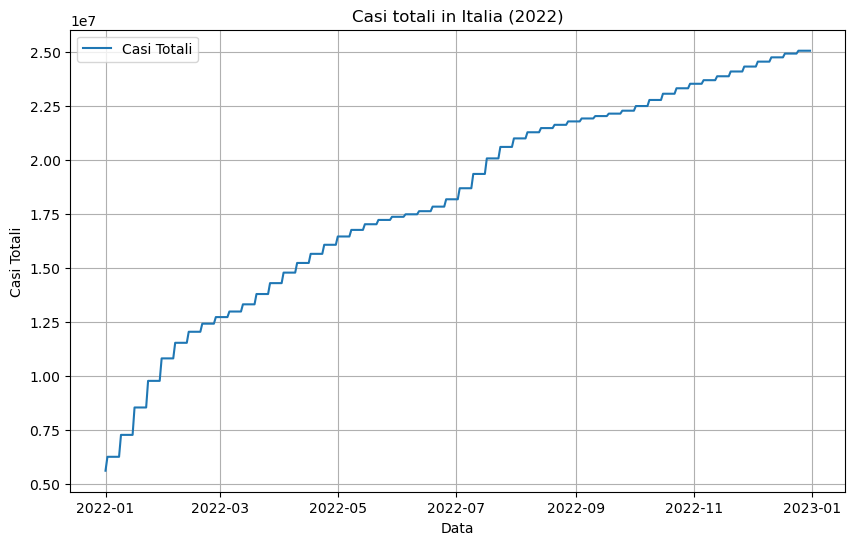

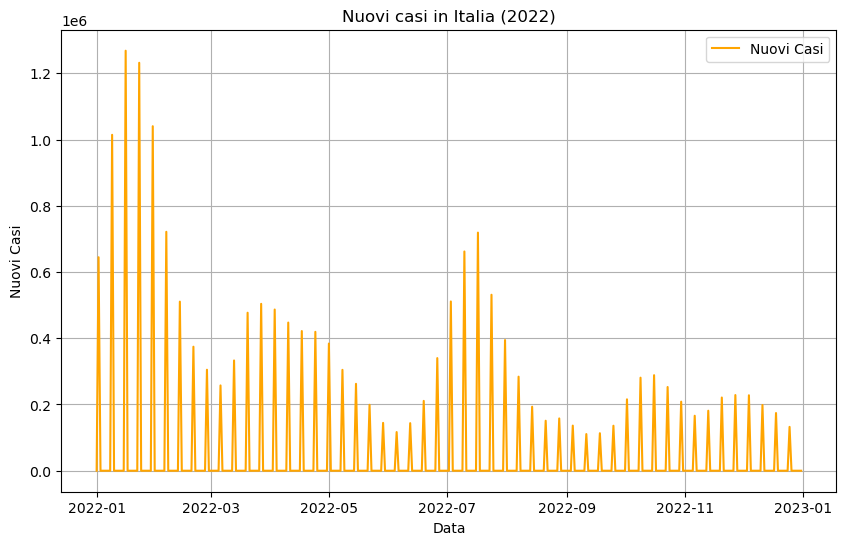

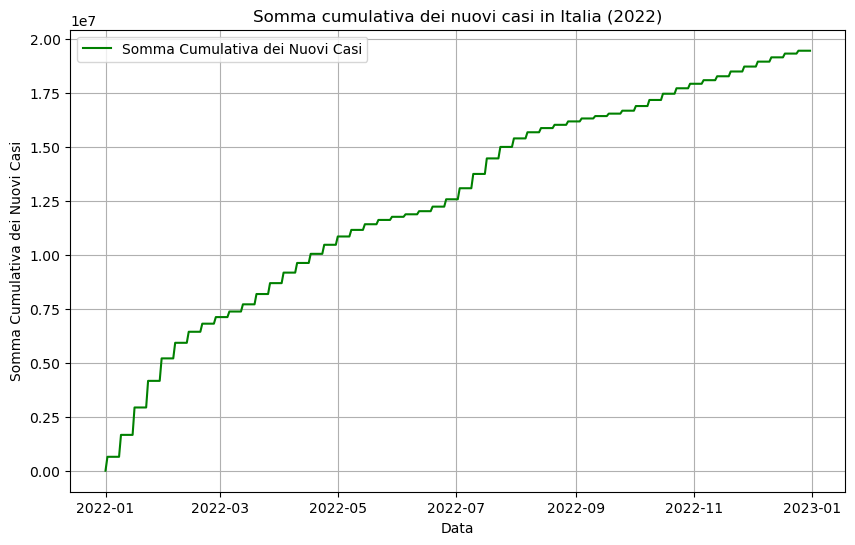

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Carico il file Excel
file_path = "/Users/ildon91/Desktop/corso epicode/M3/dapt2024/esame/covid_data.xlsx"
df = pd.read_excel(file_path)

# Mi assicuro che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtro i dati per l'Italia nel 2022
italy_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)].copy()

# Grafico dei casi totali nel tempo
plt.figure(figsize=(10, 6))
plt.plot(italy_2022['date'], italy_2022['total_cases'], label='Casi Totali')
plt.title('Casi totali in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.legend()
plt.grid(True)
plt.show()

# Grafico dei nuovi casi nel tempo
plt.figure(figsize=(10, 6))
plt.plot(italy_2022['date'], italy_2022['new_cases'], label='Nuovi Casi', color='orange')
plt.title('Nuovi casi in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.legend()
plt.grid(True)
plt.show()

# Somma cumulativa dei nuovi casi
italy_2022['cumulative_new_cases'] = italy_2022['new_cases'].cumsum()

# Grafico della somma cumulativa dei nuovi casi
plt.figure(figsize=(10, 6))
plt.plot(italy_2022['date'], italy_2022['cumulative_new_cases'], label='Somma Cumulativa dei Nuovi Casi', color='green')
plt.title('Somma cumulativa dei nuovi casi in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa dei Nuovi Casi')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Si osserva una certa similarità tra l'andamento dei casi totali e la somma cumulativa dei nuovi casi, con una crescita più graduale per la somma cumulativa.

In [ ]:
# BOXPLOT ICU DI ITALIA, GERMANIA E FRANCIA DA MAGGIO 2022 AD APRILE 2023

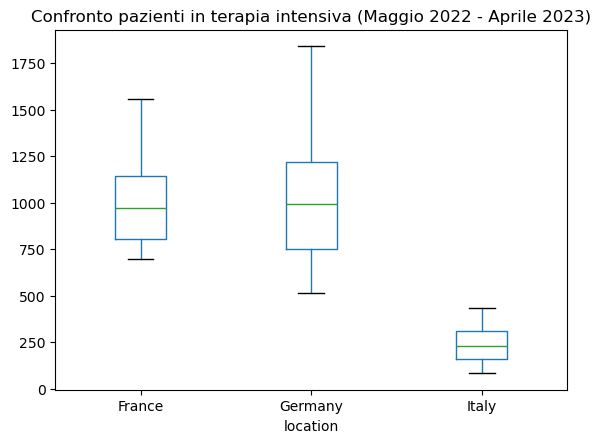

In [51]:
icu_data = df[(df['location'].isin(['Italy', 'Germany', 'France'])) & 
              (df['date'] >= '2022-05-01') & (df['date'] <= '2023-04-30')]

icu_data.boxplot(by='location', column=['icu_patients'], grid=False)
plt.title('Confronto pazienti in terapia intensiva (Maggio 2022 - Aprile 2023)')
plt.suptitle('')
plt.show()


In [ ]:
# Variabilità: La Germania mostra la maggiore variabilità nel numero di pazienti in terapia intensiva, seguita dalla Francia, mentre l'Italia ha la variabilità più bassa.
# Distribuzione: La distribuzione dei pazienti in terapia intensiva è più concentrata verso il basso in Italia rispetto alla Francia e alla Germania.
# Implicazioni: Questi dati potrebbero riflettere differenze nelle politiche sanitarie, nella gestione della pandemia, o nelle capacità del sistema sanitario tra i tre paesi. È importante considerare anche altri fattori, come l'età della popolazione, il tasso di vaccinazione e le misure di contenimento del virus adottate nei diversi periodi.

In [ ]:
# SOMMA DEI PAZIENTI OSPITALIZZATI PER ITALIA, GERMANIA, FRANCIA E SPAGNA NEL 2023

In [69]:
hosp_data = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
               (df['date'].str.contains('2023'))]

hosp_sum = hosp_data.groupby('location')['hosp_patients'].sum()
print(hosp_sum)


location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [ ]:
# PER QUESTA ANALISI, POSSIAMO SOSTITUIRE I VALORI NULLI CON LA MEDIA DEI PAZIENTI OSPITALIZZATI PER OGNI NAZIONE

In [15]:
import pandas as pd

# Carico il file Excel
file_path = "/Users/ildon91/Desktop/corso epicode/M3/dapt2024/esame/covid_data.xlsx"
df = pd.read_excel(file_path)

# Mi assicuro che la colonna 'date' sia in formato datetime
df['date'] = pd.to_datetime(df['date'])

# Filtro i dati per le nazioni e per l'anno 2023
hosp_data = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
               (df['date'].dt.year == 2023)].copy()

# Visualizzo i dati nulli
null_data = hosp_data[hosp_data['hosp_patients'].isnull()]
print("Dati nulli trovati:")
print(null_data[['location', 'date', 'hosp_patients']])

# Sostituisco i valori nulli con la media dei valori presenti
hosp_data['hosp_patients'] = hosp_data['hosp_patients'].fillna(hosp_data['hosp_patients'].mean())

# Calcolo la somma dei pazienti ospitalizzati per ognuna delle nazioni
hosp_sum = hosp_data.groupby('location')['hosp_patients'].sum()
print("Somma dei pazienti ospitalizzati per nazione nel 2023 (dopo sostituzione dei null):")
print(hosp_sum)


Dati nulli trovati:
       location       date  hosp_patients
124492   France 2023-04-01            NaN
124493   France 2023-04-02            NaN
124494   France 2023-04-03            NaN
124495   France 2023-04-04            NaN
124496   France 2023-04-05            NaN
...         ...        ...            ...
346696    Spain 2023-12-27            NaN
346697    Spain 2023-12-28            NaN
346698    Spain 2023-12-29            NaN
346699    Spain 2023-12-30            NaN
346700    Spain 2023-12-31            NaN

[843 rows x 3 columns]
Somma dei pazienti ospitalizzati per nazione nel 2023 (dopo sostituzione dei null):
location
France     2.680667e+06
Germany    1.722923e+06
Italy      1.175272e+06
Spain      1.312830e+06
Name: hosp_patients, dtype: float64
